Дерево на примере символьной регрессии

ВАЖНО!
Для нормальной работы библиотек нужно прописать в Anaconda:

conda install graphviz pygraphviz -c alubbock

conda install pydot

dot -c

neg(sub(neg(mul(add(mul(x, x), add(x, sub(sub(mul(x, mul(x, x)), x), neg(x)))), x)), x))
(6.82696892143e-17,)


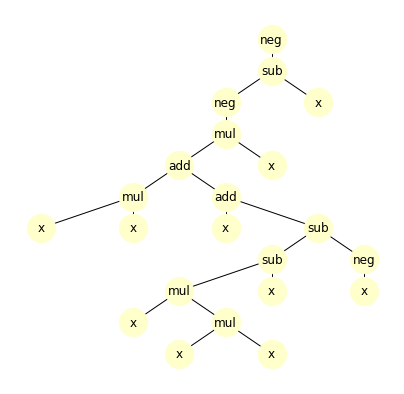

In [20]:
import operator, random
from deap import algorithms, base, creator, tools, gp
import math

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

pset = gp.PrimitiveSet(name="MAIN", arity=1)
pset.addPrimitive(operator.add, arity=2)
pset.addPrimitive(operator.sub, arity=2)
pset.addPrimitive(operator.mul, arity=2)
pset.addPrimitive(operator.neg, arity=1)
pset.renameArguments(ARG0="x")

toolbox = base.Toolbox()
toolbox.register("expr", gp.genFull, pset=pset, min_=1, max_=3)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evaluateRegression(individual, points, pset):
    func = gp.compile(expr=individual, pset=pset)
    sqerrors = ((func(x) - x**4 - x**3 - x**2 - x)**2 for x in points)
    return math.sqrt(sum(sqerrors) / len(points)),

toolbox.register("evaluate", evaluateRegression, points=[x/10. for x in range(-10, 10)],
                 pset=pset)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)
toolbox.register("select", tools.selTournament, tournsize=3)

if __name__ == "__main__":
    pop = toolbox.population(n=300)
    algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=40, verbose=False)
    bests = tools.selBest(pop, k=1)
    print(bests[0])
    print(bests[0].fitness)
    
import pygraphviz as pgv
import matplotlib.pyplot as plt
import networkx

nodes, edges, labels = gp.graph(bests[0])
graph = networkx.Graph()
graph.add_nodes_from(nodes)
graph.add_edges_from(edges)
#pos = graphviz_layout(graph, prog='dot')
pos = networkx.nx_agraph.graphviz_layout(graph, prog="dot")

plt.figure(figsize=(7,7))
networkx.draw_networkx_nodes(graph, pos, node_size=800, node_color='#ffffcc')
networkx.draw_networkx_edges(graph, pos)
networkx.draw_networkx_labels(graph, pos, labels)
plt.axis("off")
plt.show()